# <center> **KELOMPOK 10**
#### <center> Tugas Besar Mata Kuliah KU1102-Pengenalan Komputasi 
#### <center> Semester 01 2022/2023            

### NAMA ANGGOTA : 

- (16022049)  Salwana Diva                    
- (16022099)  Irisha Kayla Napitupulu         
- (16022149)  Vincent Andrew Sebastian S.     
- (16022199)  Maharaka Fadhilah               
- (16022249)  Geraldhika Revaldo Arya Rinding 
- (16022299)  Yuan Bintang Mydia              
- (16022349)  Afrah Damara Yani               
- (16022399)  Shafrina Farhyan                
- (16022449)  Eliza Putri Hapsani             

---

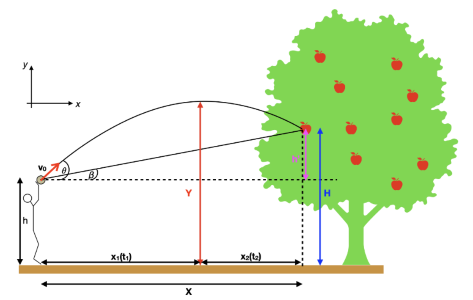  
Seseorang berusaha untuk mengambil buah di pohon dengan cara melemparkan tali pengait yang diberi beban pada ujungnya. 
Orang tersebut mencoba melempar buah dari jarak $X = 7.0$ m. Buah pertama terlihat pada ketinggian $H = 3.0$ m. 

Jika kecepatan awal ($v_0$) dinyatakan dalam: 
$$
v_0 = [g(h' + \sqrt{h'^2+X^2} )]^{1/2}...(1)
$$

Jelaskan hubungan antara sudut lemparan optimal ($θ$) , kecepatan awal ($v_0$), ketinggian awal saat tali pengait ($h$) dilemparkan! Gunakan metoda komputasi untuk menentukan sudut lemparan agar tepat mengenai sasarannya! (Metoda numerik 
dikerjakan dengan ketelitian $10^{-4}$)

Diberikan :
$$
\frac {dv_0}{dθ} = Xtan^2(θ) - 2h'tan(θ) - X = 0...(2)
$$

$$
\frac {1}{(cosθ)^2} = (tanθ)^2 + 1
$$

### IMPORT LIBRARY

In [8]:
import math
import pandas as pd
import matplotlib.pyplot as plt

### NILAI KONSTAN YANG DIKETAHUI

In [9]:
# ----- KAMUS ----- 
# H : integer
# X : integer
# g : float

H = 3    # ketinggian buah di pohon, satuan: meter
X = 7    # jarak pelempar dengan buah di pohon, satuan: meter
g = 9.8  # percepatan gravitasi, satuan: m/s^2

---

## **METODE NUMERIK**

### **SUBPROGRAM**

>Fungsi untuk mencari nilai persamaan kuadrat, dari turunan kecepatan awal ($v_0$) terhadap sudut lemparan (𝜃)


In [10]:
 # ----- KAMUS ----- 
# X, a, c : integer
# f, v0, g, hf, b, tan_theta, theta : float

def f(x) :
    f = X*(math.tan(x))**2 + 2*hf*math.tan(x) - X
    return f

>Fungsi untuk menghitung besar kecepatan awal ($v_0$)

In [11]:
# ----- KAMUS ----- 
# X : integer
# v0, g, hf : float

def KecepatanAwal (hf):
    v0 = math.sqrt(g*(hf + math.sqrt((hf**2)+(X**2))))
    return (v0)

>Fungsi untuk menentukan besar sudut dengan metode numerik bisection

In [12]:
# ----- KAMUS ----- 
# a, b, x, galat, sudut : float
# iterasi : integer

def Sudut (hf):
    a = 0                    # batas bawah sudut
    b = math.radians(90)     # batas atas sudut
    galat = 0.0001
    iterasi = 0

    # Pengulangan sampai mendapat nilai a dan b dengan galat yang diinginkan
    while abs(b-a) > galat :
        iterasi += 1
        e = b-a
        x = (a+b)/2

        if f(a)*f(x) < 0 :
            b = x
        else :
            a = x

    # Menemukan sudut optimal
    sudut = math.degrees(a)
    return sudut

### **MAIN PROGRAM**

##### PROGRAM UNTUK MENENTUKAN KECEPATAN AWAL DAN SUDUT LEMPARAN OPTIMAL
  
>Program ini akan meminta masukan ketinggian awal pelemparan ($h_i$, dalam satuan meter) dari user dan menghasilkan output kecepatan awal ($v_0$, dalam satuan m/s) dan sudut lemparan optimal (𝜃, dalam derajat) agar beban pada tali pengait yang dilempar dapat tepat mengenai buah di pohon.

In [13]:
# ----- KAMUS -----
# hi    : float
# hf    : float
# v0    : float
# theta : float

# Menghitung besar kecepatan awal (v0) 
hi = float(input("Masukan tinggi orang (m): "))    # input tinggi awal pelemparan  
hf = H-hi                                          # perbedaan ketinggian antara buah di pohon dengan tinggi pelempar
v0 = KecepatanAwal (hf)
print(f"Untuk tinggi lemparan awal {hi} meter, kecepatan awal lemparannya adalah {v0}", end='')

# Menentukan sudut lemparan optimal dari persamaan kuadrat
theta = Sudut (hf)
print(f"sudut lemparan optimal {theta} derajat.")

Untuk tinggi lemparan awal 1.6 meter, kecepatan awal lemparannya adalah 9.14759792112077sudut lemparan optimal 39.342041015625 derajat.


##### PROGRAM UNTUK MENCARI SUDUT OPTIMAL DENGAN METODE BISECTION

>Program ini dibuat terpisah dari subprogram sebelumnya dengan tujuan untuk mengetahui step by step cara menemukan akar persamaan non-linier menggunakan metode numerik bisection

In [16]:
# ----- KAMUS -----
# tabel, akar, data : data frame
# a, b, e, x, galat, sudut, derajat : float
# iterasi : integer
# H, X : integer
# g, hi, hf, v0, theta : float

# Membuat tempat menyimpan data untuk metode bisection
tabel = {}
tabel["a"] = [0 for i in range (14)]
tabel["b"] = [0 for i in range (14)]
tabel["galat"] = [0 for i in range (14)]

# Sudut yang mungkin adalah 0 < 𝜃 < 90 derajat
a = 0
b = math.radians(90)
galat = 0.0001       # ketelitian metode numerik yang diminta adalah 10**(-4)
iterasi = 0          # inisialisasi jumlah iterasi

# Pengulangan untuk metode bisection
while abs(b-a) > galat :
    iterasi += 1
    e = b-a
    x = (a+b)/2

    tabel["a"][iterasi-1] = a
    tabel["b"][iterasi-1] = b
    tabel["galat"][iterasi-1] = e

    if f(a)*f(x) < 0 :
        b = x
        print(f'a = {a}, b = {b}, galat = {e}')
    else :
        a = x
        print(f'a = {a}, b = {b}, galat = {e}')

# Menemukan sudut optimal
sudut = tabel["a"][iterasi-1]
derajat = math.degrees(sudut)
print(f'Setelah {iterasi} kali iterasi, diperoleh sudut optimal {derajat} derajat')

# Menulis data ke dalam file excel
akar = pd.DataFrame(data=tabel)
akar.to_csv("TubesBisection.csv")

a = 0, b = 0.7853981633974483, galat = 1.5707963267948966
a = 0.39269908169872414, b = 0.7853981633974483, galat = 0.7853981633974483
a = 0.5890486225480862, b = 0.7853981633974483, galat = 0.39269908169872414
a = 0.5890486225480862, b = 0.6872233929727672, galat = 0.19634954084936207
a = 0.6381360077604268, b = 0.6872233929727672, galat = 0.09817477042468103
a = 0.662679700366597, b = 0.6872233929727672, galat = 0.04908738521234046
a = 0.674951546669682, b = 0.6872233929727672, galat = 0.024543692606170286
a = 0.6810874698212246, b = 0.6872233929727672, galat = 0.012271846303085199
a = 0.684155431396996, b = 0.6872233929727672, galat = 0.006135923151542655
a = 0.6856894121848816, b = 0.6872233929727672, galat = 0.003067961575771272
a = 0.6864564025788245, b = 0.6872233929727672, galat = 0.0015339807878856915
a = 0.6864564025788245, b = 0.6868398977757959, galat = 0.0007669903939427902
a = 0.6866481501773102, b = 0.6868398977757959, galat = 0.0003834951969714506
a = 0.6866481501773102,

#### PROGRAM UNTUK MENULIS DATA

>Data yang ditulis merupakan data hubungan antara sudut lemparan optimal (𝜃), kecepatan awal ($v_0$), dan ketinggian awal ($h_i$) saat tali pengait dilemparkan. Tujuan penulisan data ini adalah untuk memudahkan dalam membuat scatter plot hubungan ketiganya.

In [ ]:
# ----- KAMUS -----
# df      : Data frame
# V0      : float
# Tinggi  : float
# Sudut   : float
# h       : float
# H       : Interger
# g       : float
# X       : Integer
# a       : float
# b       : float
# n       : float

# Input batas bawah dan batas atas hi
a = float(input("Masukkan ketinggian awal terendah (m): "))
b = float(input("Masukkan ketinggian awal tertinggi (m): "))
n = float(input("Masukkan selisih antarketinggian awal (m): "))

# Membuat data hubungan ketinggian awal saat tali pengait dilemparkan (hi), kecepatan awal (v0), dan sudut lemparan optimal (𝜃)
x = int(((b-a)//n)+2)
data = {}
data["KetinggianAwal"] = [0 for i in range (x)]
data["PerbedaanKetinggian"] = [0 for i in range (x)]
data["KecepatanAwal"] = [0 for i in range (x)]
data["SudutOptimal"] = [0 for i in range (x)]

# Menyimpan data ketinggian awal, perbedaan ketinggian, kecepatan awal, dan sudut optimal
for i in range (x):
    data["KetinggianAwal"][i] = a + n*i
    data["PerbedaanKetinggian"][i] = H - data["KetinggianAwal"][i]
    hf = data["PerbedaanKetinggian"][i]
    data["KecepatanAwal"][i] = KecepatanAwal(hf)
    v0 = data["KecepatanAwal"][i]
    data["SudutOptimal"][i] = Sudut(hf)

# Menuliskan data ke dalam file csv
df = pd.DataFrame(data=data)
df.to_csv("TubesHubungan.csv", sheet_name = "v0, h, theta")

### IMPORT DATA

In [ ]:
#Pandas akan membaca file TubesHubungan.csv yang ada di D:/, lalu menyimpan dataframe dengan nama df
df = pd.read_csv("D:/TubesHubungan.csv")
df

,Unnamed: 0,KetinggianAwal,PerbedaanKetinggian,KecepatanAwal,SudutOptimal
0,0,1.00,2.00,9.536513,37.023926
1,1,1.01,1.99,9.529964,37.062378
2,2,1.02,1.98,9.523417,37.100830
3,3,1.03,1.97,9.516873,37.139282
4,4,1.04,1.96,9.510330,37.177734
...,...,...,...,...,...
96,96,1.96,1.04,8.918800,40.770264
97,97,1.97,1.03,8.912500,40.814209
98,98,1.98,1.02,8.906203,40.852661
99,99,1.99,1.01,8.899910,40.891113


#### PROGRAM UNTUK MENAMPILKAN SCATTER PLOT HUBUNGAN ANTARA KECEPATAN AWAL, SUDUT LEMPARAN OPTIMAL, DAN KETINGGIAN AWAL

>##### Scatter plot hubungan ketinggian awal dan sudut optimal

Nilai korelasi antara ketinggian awal dan sudut optimal adalah 0.999970173329986.


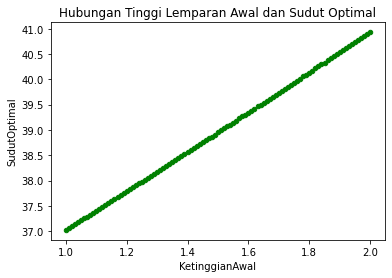

In [ ]:
df.plot(kind="scatter",x="KetinggianAwal",y="SudutOptimal",title="Hubungan Tinggi Lemparan Awal dan Sudut Optimal",ylabel="Sudut Optimal",color="green")
print(f'Nilai korelasi antara ketinggian awal dan sudut optimal adalah {df["KetinggianAwal"].corr(df["SudutOptimal"])}.')
plt.show()

> ##### Scatter plot hubungan ketinggian awal dan kecepatan awal


Nilai korelasi antara ketinggian awal dan kecepatan awal adalah -0.9999859813208142.


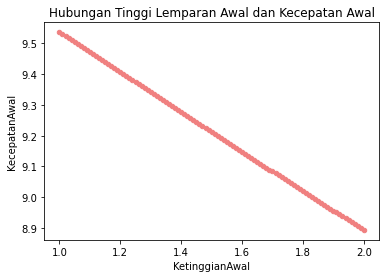

In [ ]:
df.plot(kind="scatter",x="KetinggianAwal",y="KecepatanAwal",title="Hubungan Tinggi Lemparan Awal dan Kecepatan Awal",ylabel="Kecepatan Awal",color="lightcoral")
print(f'\nNilai korelasi antara ketinggian awal dan kecepatan awal adalah {df["KetinggianAwal"].corr(df["KecepatanAwal"])}.')
plt.show()

> ##### Scatter plot hubungan sudut optimal dan kecepatan awal


Nilai korelasi antara sudut optimal dan kecepatan awal adalah -0.9999159904452211.


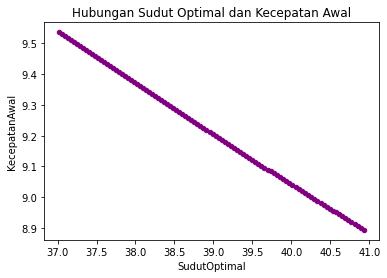

In [ ]:
df.plot(kind="scatter",x="SudutOptimal",y="KecepatanAwal",title="Hubungan Sudut Optimal dan Kecepatan Awal",ylabel="Kecepatan Awal",xlabel="Sudut Optimal",color="purple")
print(f'\nNilai korelasi antara sudut optimal dan kecepatan awal adalah {df["KecepatanAwal"].corr(df["SudutOptimal"])}.')
plt.show()

### **FLOWCHART**

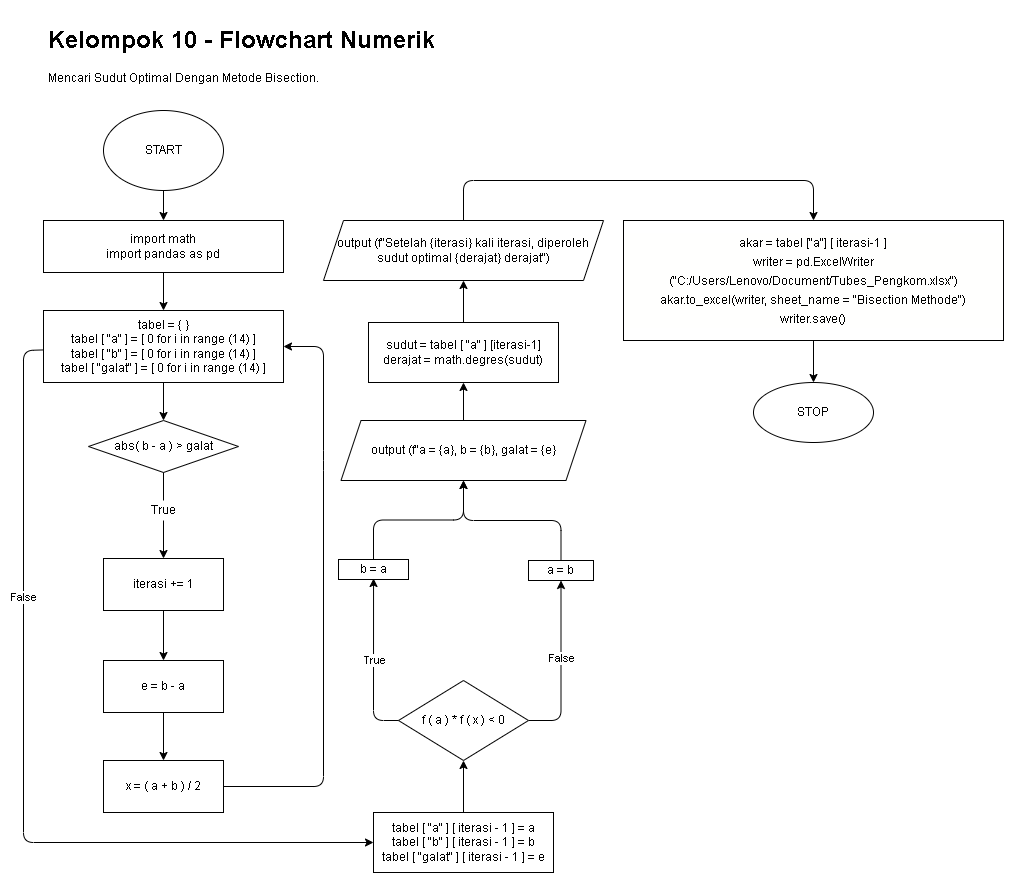

---

## **METODE ANALITIK**

### **SUBPROGRAM** _(untuk rumus kuadrat sempurna)_
>Fungsi untuk menghitung besar sudut lemparan optimal

In [ ]:
# ----- KAMUS ----- 
# X, a, c : integer
# v0, g, hf, b, tan_theta, theta : float

def SudutABC (hf):
    a = X
    b = -2*hf
    c = -X
    tan_theta = (-b + (math.sqrt((b**2) - 4*a*c)))/(2*a)
    theta = math.atan(tan_theta)
    return (math.degrees(theta))

### **SUBPROGRAM** _(untuk metode bisection)_
>Fungsi untuk menentukan besar sudut dengan metode numerik bisection

In [ ]:
# ----- KAMUS ----- 
# a, b, x, galat, sudut : float
# iterasi : integer

def SudutBis (hf):   
    a = 0                 # batas bawah sudut
    b = math.radians(90)  # batas atas sudut
    galat = 0.0001
    iterasi = 0

    # Pengulangan sampai mendapat nilai a dan b dengan galat yang diinginkan
    while abs(b-a) > galat :
        iterasi += 1
        e = b-a
        x = (a+b)/2

        if f(a)*f(x) < 0 :
            b = x
        else :
            a = x

    # Menemukan sudut optimal
    sudut = math.degrees(a)
    return sudut


### **MAIN PROGRAM** 

In [ ]:
# ----- KAMUS -----
# hi    : float
# hf    : float
# v0    : float
# theta : float

hi = float(input("Masukan tinggi orang (m): "))    # input tinggi awal pelemparan  
hf = H-hi   # perbedaan ketinggian antara buah di pohon dengan tinggi pelempar

# Menentukan sudut lemparan optimal menggunakan rumus kuadrat sempurna (metode analitik)
theta_abc = SudutABC (hf)
print(f"Dengan rumus kuadrat sempurna, diperoleh sudut lemparan optimal {theta_abc} derajat saat tinggi lemparan awalnya {hi} meter")

# Menentukan sudut lemparan optimal menggunakan metode numerik bisection
theta_bisection = SudutBis (hf)
print(f"Dengan rumus kuadrat sempurna, diperoleh sudut lemparan optimal {theta_bisection} derajat saat tinggi lemparan awalnya {hi} meter")

Dengan rumus kuadrat sempurna, diperoleh sudut lemparan optimal 49.06505117707799 derajat saat tinggi lemparan awalnya 2.0 m.
Dengan rumus kuadrat sempurna, diperoleh sudut lemparan optimal 40.9295654296875 derajat saat tinggi lemparan awalnya 2.0 m.


___

## **PEMBUKTIAN RUMUS**
>_PERSAMAAN 1 & 2_

Rumus mencari gerak horizontal :
$$
X = (v_0cos\theta).(t_1+t_2) ... (3)
$$
Rumus mencari gerak vertikal :
$$
v_0sin\theta=gt_1 ... (4)
$$
Dari persamaan ke-2, ditemukan perpindahan bola pada gerak vertikal $(h')$ :
$$
h' = (v_0sin\theta)(t_1+t_2)-\frac{1}{2}(t_1+t_2)^2 ... (5)
$$
$t_1$ dan $t_2$ merupakan interval waktu ketika bola dilempar hingga ketinggian $(y)$ serta interval waktu dari ketinggian maksimum. $(g)$ adalah percepatan gravitasi permukaan bumi.  

Untuk menemukan kecepatan awal minimum bola, hubungan antara sudut yang dihasilkan dan kecepatan awal harus diketahui. Persamaan (5) dapat dituliskan kembali sebagai :
$$
h' = \frac{g}{2}(t_1+t_2)[2t_1-(t_1+t_2)] ... (6)
$$
Substitusikan persamaan (3) pada persamaan (4) sehingga didapatkan persamaan berikut :
$$
h' = \frac{g}{2}.\frac{X}{v_0cos\theta}[2t_1-\frac{X}{v_0cos\theta}]=Xtan\theta-\frac{gX^2}{xv_0^2cos^2\theta}...(7)
$$
Persamaan (7) dapat pula dituliskan sebagai :
$$
v_0= \sqrt\frac{gX^2(tan^2\theta+1)}{2(Xtan\theta-h')}...(8)
$$
Untuk menyelesaikannya, $v_0$ perlu diturunkan terhadap $θ$ dan tetapkan turunannya bernilai sama dengan 0. Kemudian didapatkan persamaan berikut :
$$
\frac{dv_0}{d\theta}=(Xtan\theta-h')tan\theta-\frac{X}{2}sec^2\theta=0...(9)
$$
Diketahui salah satu identitas trigonometri : $sec^2\theta=\frac{1}{cos^2\theta}=tan^2\theta+1$
Sehingga persamaan(9) dapat disederhanakan sebagai berikut :
$$
\frac{dv_0}{d\theta}=Xtan^2\theta-2h'tan\theta-X=0...(10)
$$
Dari persamaan kuadrat ;$Ax^2+Bx+C=0, x=\frac{-B\pm\sqrt{B^2-4AC}}{2A}$,A, B dan C konstan. Dipilih solusi yang bernilai positif sehingga didapatkan nilai $\theta$ :
$$
\theta = tan^-1(\frac{h'+\sqrt{h^2+X^2}}{X})...(11)
$$
Substitusikan persamaan (11) kembali ke persamaan (9).  Sehingga didapat persamaan berikut :
$$
v_0=[g(h'+\sqrt{h^2+X^2})]^\frac{1}{2}...(12)
$$
dengah $h'$ = $H-h$